In [109]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


#Importing the dataset
iris_data = pd.read_csv("Iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [124]:

#By looking at the above data.head() We can see that we have 4 independent variables as follows:

#1) sepalLengthCm
#2) sepalWidthCm
#3) PetalLengthCm
#4) PetalWidthCm

# Also we have dependent variable which is the Species colum

#Iris-setosa, Iris-versicolor, Iris-virginica

In [125]:
#Convert string classes in the 'species' column into numeric classes

#species = list(iris_data['Species'].unique())
#iris_data['species_index'] = iris_data['Species'].apply(species.index)
#iris_data.head()

In [126]:
#To simplify the process in this task we are going to be using 
# sklearn.datasets and import the iris dataset directly from online



In [127]:
from sklearn.datasets import load_iris

data = load_iris()


In [128]:
### independent variables

data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [129]:
#dependent variable

data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [130]:
#Assign the independent variable value(s)
X_var = data.data
X_var.shape

(150, 4)

In [131]:

y = data.target
y.shape

(150,)

In [132]:
#We reshape to accommodate the array since our library doesn't allow 1D so we convert to 2D

y = y.reshape(-1,1)

y.shape


(150, 1)

In [133]:
#We have to split the data into training and test sets of 80 and 20 percents respectively

#we have to import train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split


In [134]:
#lets split the data

X_train, X_test, y_train, y_test = train_test_split(X_var, y, test_size = 0.20)

In [135]:
#Creating Linear Regression

linearReg = LinearRegression()

In [136]:
#Fitting the model on the training data

model = linearReg.fit(X_train, y_train)


In [139]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [0.1891557]
Coefficients: 
 [[-0.10305184 -0.04965275  0.21980053  0.62777222]]


In [140]:
#Generate predictions for the test set
predictions = model.predict(X_test)

In [141]:
#Import R2: to aid us in calculatiung and seeing the score of our predictions

from sklearn.metrics import r2_score

In [142]:

r2_score(y_test, predictions)

0.9004848809844541

<ErrorbarContainer object of 3 artists>

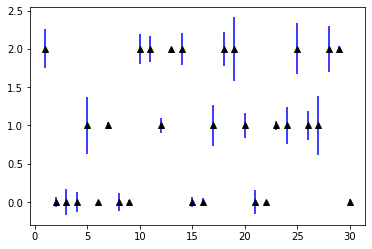

In [37]:
#Genering an error plot for the predictions
plt.errorbar(range(1, len(y_test)+1), y_test, yerr=(y_test-predictions), fmt='^k', ecolor='b')

In [38]:
#To compute RMSE the following has to be done:
#1) get the distance between the y_test and the prediction
#2) raise it to the power of 2 
#3) get the average number
#4) use the numpy square root function.
np.sqrt(((predictions - y_test)**2).mean()) 



0.19858036620481023